# First attempt at a mother py script


# Imports

### Allowed ones

In [19]:
import numpy as np
import pandas as pd

### Ones from our files

In [20]:
from exploratory_analysis import Image

### For library implementations, exploratory analysis or visualisations

In [25]:
import matplotlib.pyplot as plt

import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

# Data Load
### Currently commented out the test data as we don't need to use this yet

In [2]:
test_data_filepath = '..\\fashion_test.npy'
train_data_filepath = '..\\fashion_train.npy'
fashion_train = np.load(train_data_filepath)
#fashion_test = np.load(test_data_filepath)

# Plot some images with their given class

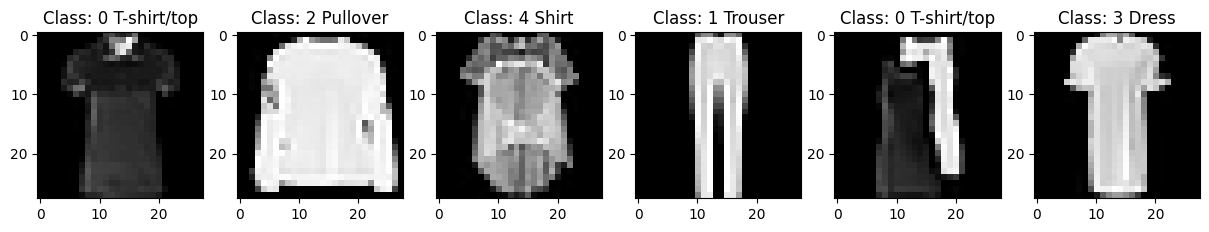

In [3]:
image_choices = [100, 4511, 200, 300, 444, 500]

image_shape = (28,28)

fig, axs = plt.subplots(1, len(image_choices), figsize=(15, 3))

n = 0

for index_choice in image_choices:
        
    this_image = Image(fashion_train, index_choice)

    axs[n].imshow(this_image.image.reshape(image_shape), cmap='gray')
    axs[n].set_title(f"{this_image._tell_class()}")

    n +=1

# Seperate just the category data (the 'Y' parts)

In [15]:
all_the_classes = []

for array in fashion_train:
    all_the_classes.append(array[-1])

array_the_classes = np.array(all_the_classes)

# Report class counts and plot the counts

Counter({0: 2033, 4: 2014, 3: 2005, 2: 2001, 1: 1947})


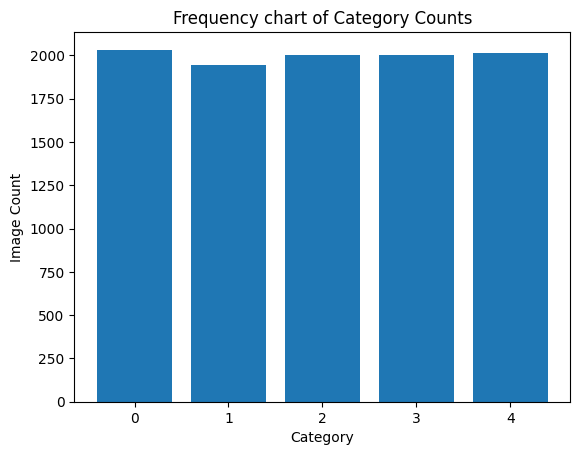

In [16]:
class_counts = Counter(array_the_classes)
print(class_counts)

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.title("Frequency chart of Category Counts")
plt.show()



# Create an array of just the image data (the 'X' part of the data)

In [17]:
all_the_images = []

for array in fashion_train:
    all_the_images.append(array[:-1])

array_the_images = np.array(all_the_images)

# Split the data into training and validation

In [22]:
X_train_initial, X_validate_initial, Y_train_initial, Y_validate_initial = train_test_split(array_the_images, array_the_classes , test_size = 0.2, random_state = 43, stratify = array_of_the_classes) #I'm hoping that the stratify parameter keeps the balance of classes in the two splits

a=len(X_train_initial)
b=len(X_validate_initial)

print(f'Train size {a} Validate size {b}')

Train size 8000 Validate size 2000


# Perform the PCA

In [28]:
pca = PCA()

# With sklearn PCA, it automatically centers the data
pca.fit(X_train_initial)

# Eigenvalues, PC scores and variance explained
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
scores = pca.transform(X_train_initial)

# Plot the cumulative explained variance

[Text(0.5, 0, 'Principal Component by Importance'),
 Text(0, 0.5, 'Cumulative Variance Ratio'),
 Text(0.5, 1.0, 'Cumulative Explained Variance')]

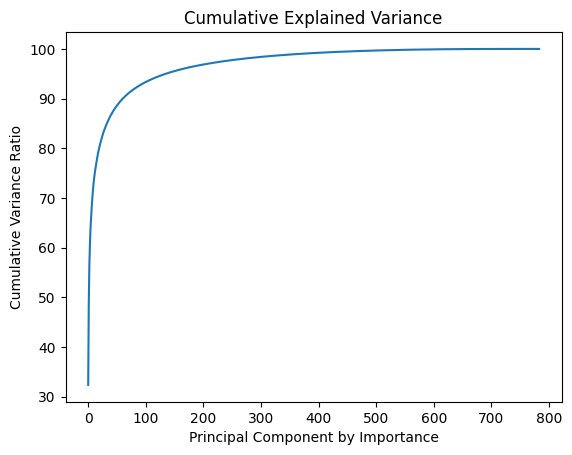

In [ ]:
CEV = sns.lineplot(x=range(0, len(eigenvectors)), y=np.cumsum(explained_variance_ratio))
CEV.set(xlabel = 'Principal Component by Importance', ylabel = 'Cumulative Variance Ratio', title = 'Cumulative Explained Variance')

# How many principal components do we use?

In [39]:
def number_of_components(variance_threshold, explained_variance_ratio = explained_variance_ratio, eigenvalues = eigenvalues):
    cum_explained_variance = 0
    no_of_components = 0
    array_of_features = []

    while cum_explained_variance <= variance_threshold:
        cum_explained_variance += explained_variance_ratio[no_of_components]
        no_of_components +=1

    for component in range(no_of_components):
        array_of_features.append(eigenvalues[component])

    return len(array_of_features)

In [40]:
number_of_components(70)

9

In [41]:
number_of_components(90)

62